### 1.여러개의 그래프

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False


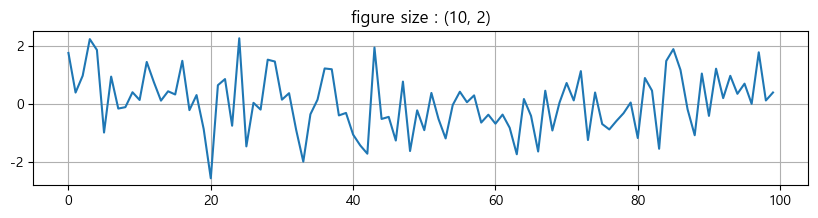

In [4]:
np.random.seed(0)
f1 = plt.figure(figsize=(10, 2))
plt.title("figure size : (10, 2)")
plt.plot(np.random.randn(100)),plt.grid()
plt.show()

- subplot()
    - 여러개 그림을 그리고 싶으면 plt.subpolt()쉬운방법,plt.subpolts()특별한 방법

In [5]:
from PIL import Image
img1 =Image.open('data/output.png')
img2 =Image.open('data/삼각함수.png')

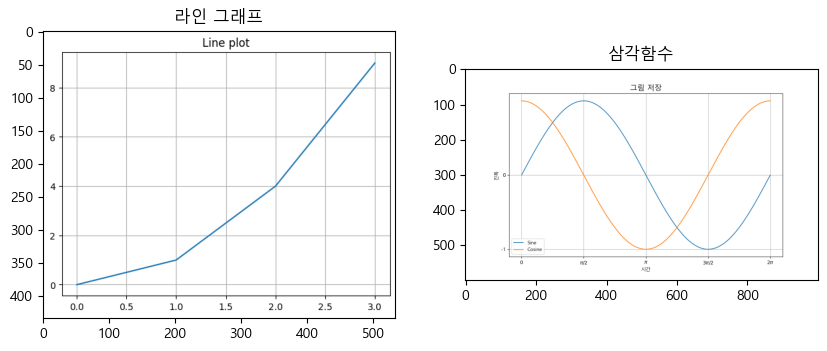

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)      # 행의갯수,열의갯수,순서 표시
plt.imshow(img1),plt.title('라인 그래프')
plt.subplot(122) #행,열,순서 이렇게 작성해도 됨
plt.imshow(img2),plt.title('삼각함수')
plt.show()


- Anscombe's Quartet

In [7]:
ans = sns.load_dataset('anscombe')
ans.head(5)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


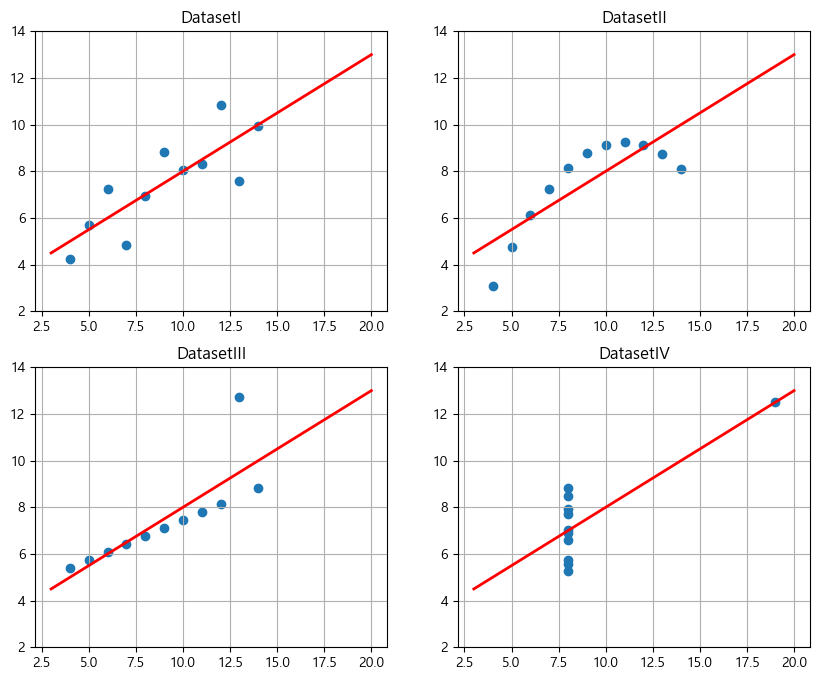

In [15]:
plt.figure(figsize=(10,8))

for index, roman in enumerate(ans.dataset.unique()):
    ds = ans[ans.dataset == roman]
    plt.subplot(2,2,index+1)
    plt.ylim(2,14)
    plt.scatter(ds['x'], ds['y'],marker='o')
    plt.plot([3,20],[4.5,13],'r-',lw=2)       # y = 0.5 * x +3
    plt.title(f'Dataset{roman}')
    plt.grid()
plt.show()

- subplots()

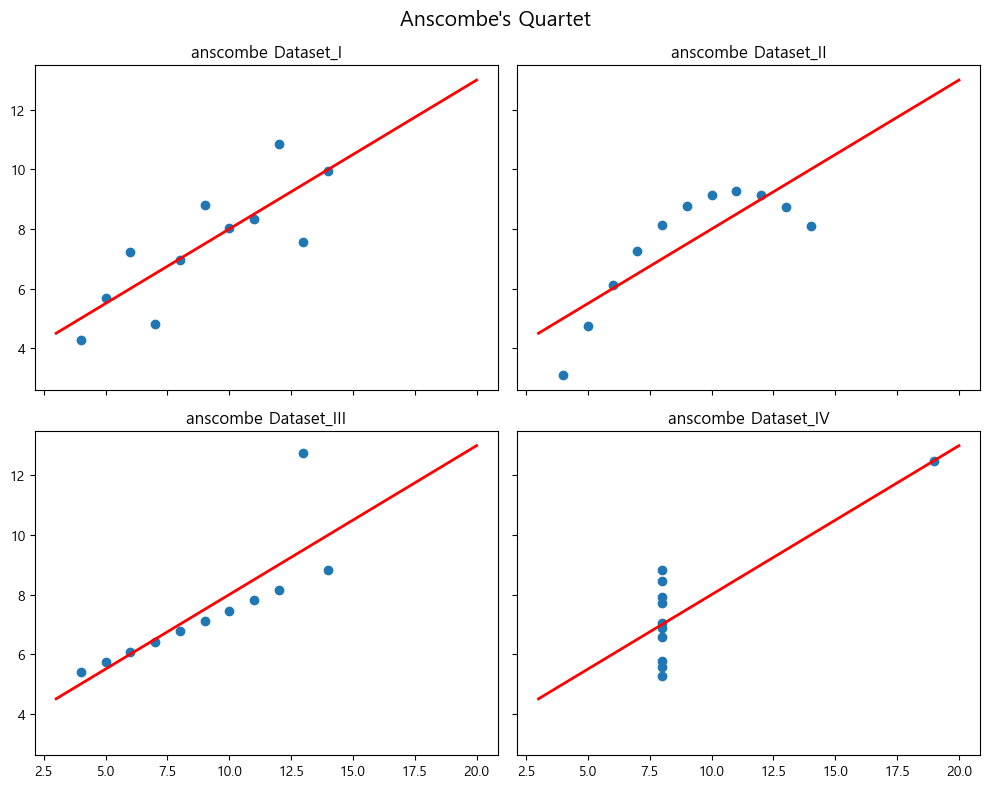

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True) # fig는 전체 그림 axes는 그림안의 그림하나

for index, roman in enumerate(ans.dataset.unique()):  # enumerate 인덱스값 순서를 줌.. enumerate(['I', 'II', 'III', 'IV'])
    ds = ans[ans.dataset == roman]
    ax = axes[index//2, index%2] # row index, dolumn index //요고 기억하기...............
    ax.scatter(ds.x,ds.y, marker='o') # 산점도 그림
    ax.plot([3,20],[4.5,13], 'r-', lw=2) # y = 0.5 * x + 3 회귀식이용 plot이 선......
    ax.set_title(f'anscombe Dataset_{roman}')

fig.suptitle("Anscombe's Quartet", fontsize=15)
plt.tight_layout() # 그림과 그림사이가 더 촘촘하게
plt.show() # for loop 다 돌고 출력해야해서

- Axis 객체와 축

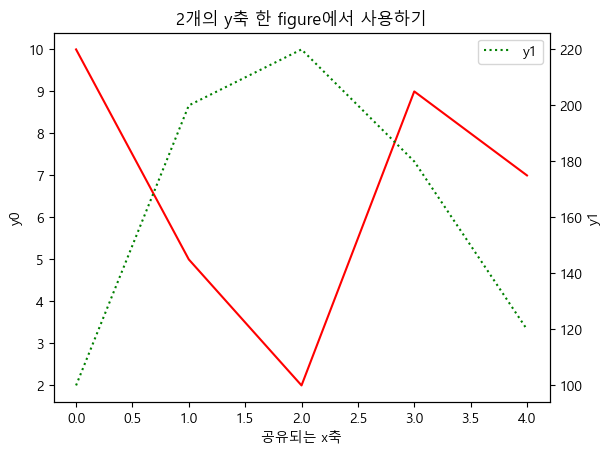

In [19]:
fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
ax0.set_title("2개의 y축 한 figure에서 사용하기")
ax0.plot([10, 5, 2, 9, 7], 'r-', label="y0")
ax0.set_ylabel("y0")
ax1.plot([100, 200, 220, 180, 120], 'g:', label="y1")
ax1.set_ylabel("y1")
ax0.set_xlabel("공유되는 x축")
plt.legend()
plt.show()

- 갤러리 있는 그래프를 그려보세요

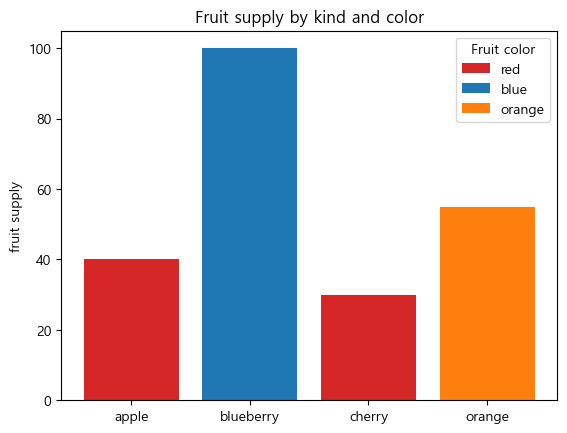

In [22]:
fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

plt.bar(fruits, counts, label=bar_labels, color=bar_colors)

plt.ylabel('fruit supply')
plt.title('Fruit supply by kind and color')
plt.legend(title='Fruit color')

plt.show()

- Iris 모든 품종의 특성에 대한 박스플롯을 하나의 그래프안에 그리기 

In [27]:
iris = sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


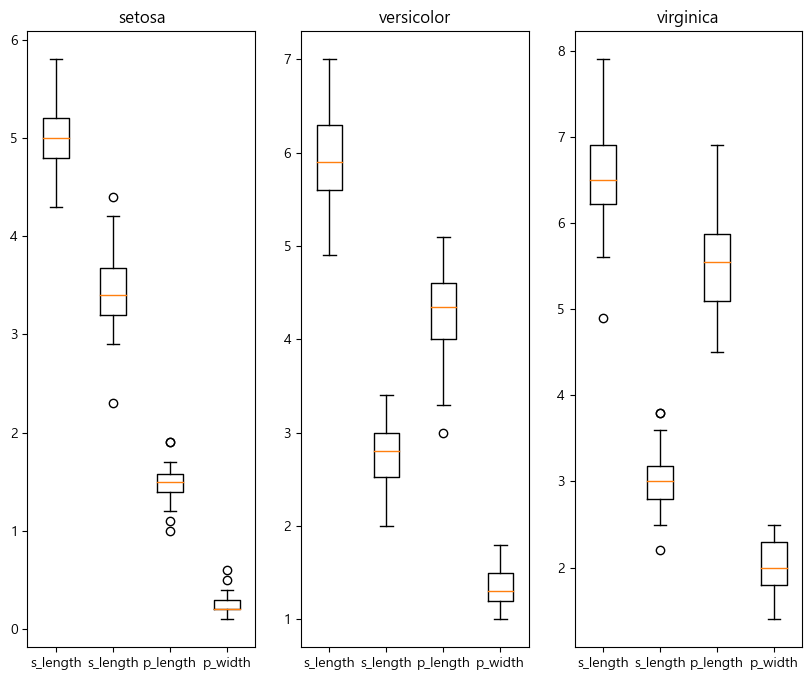

In [40]:
plt.figure(figsize=(10,8))

for index, species in enumerate(iris.species.unique()):
    ssl = iris[iris.species == species].sepal_length
    ssw = iris[iris.species == species].sepal_width
    ssa = iris[iris.species == species].petal_length
    sss = iris[iris.species == species].petal_width
    plt.subplot(1,3,index+1)
    plt.boxplot((ssl,ssw,ssa,sss),
                labels =['s_length','s_length','p_length','p_width'])
    plt.title(species)
plt.show()


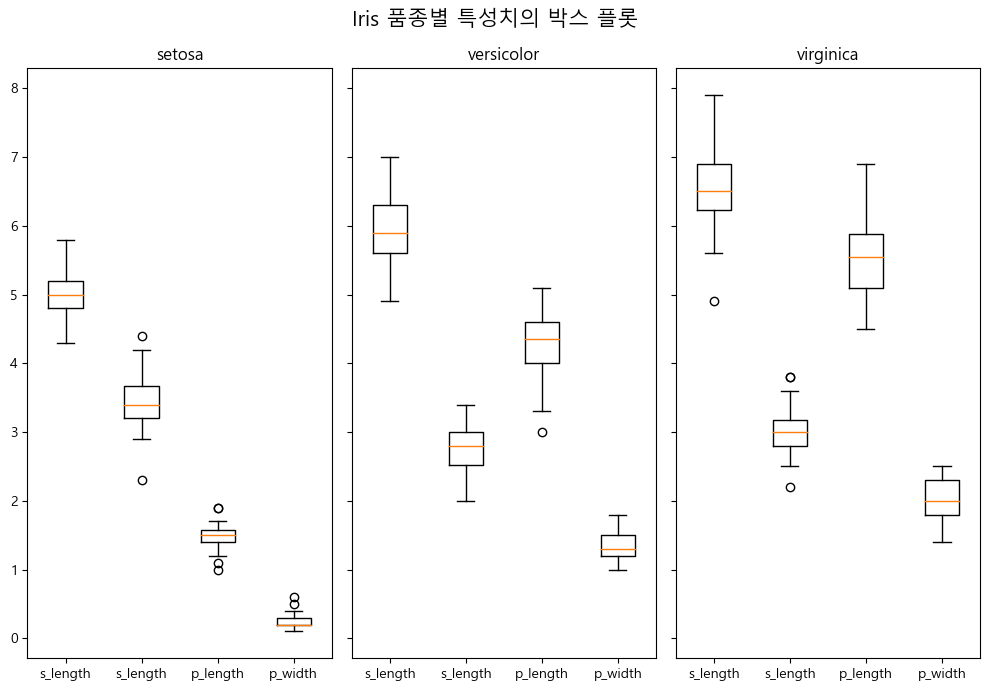

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(10,7), sharey=True)
for index, species in enumerate(iris.species.unique()):
    ssl = iris[iris.species == species].sepal_length
    ssw = iris[iris.species == species].sepal_width
    ssa = iris[iris.species == species].petal_length
    sss = iris[iris.species == species].petal_width
    ax = axes[index]
    ax.boxplot((ssl,ssw,ssa,sss),
                labels =['s_length','s_length','p_length','p_width'])
    ax.set_title(species)
fig.suptitle("Iris 품종별 특성치의 박스 플롯", fontsize=15)
plt.tight_layout()
plt.show()